In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from glob import glob
from sklearn.model_selection import train_test_split
import random
import matplotlib.pylab as plt
from glob import glob
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

SETS_PATH = '../covid_dataset/'
LABELS = ['Normal', 'Lung_Opacity', 'Viral Pneumonia', 'COVID']

2021-10-08 22:16:46.675709: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
X = []
Y = []
a=0
for i, dir in enumerate(LABELS):
    image_labels = glob(os.path.join(SETS_PATH+dir, "*.png"))
        
    for j, image in enumerate(image_labels):
        a+=1
        if (a%5000 == 0):
          print(a)
        
        X.append(cv2.imread(image, 0))
        Y.append(i)
       
X = np.asarray(X, dtype='float32').reshape((len(X), 299, 299, 1))/255
Y = to_categorical(np.array(Y), num_classes=4)

5000
10000
15000
20000


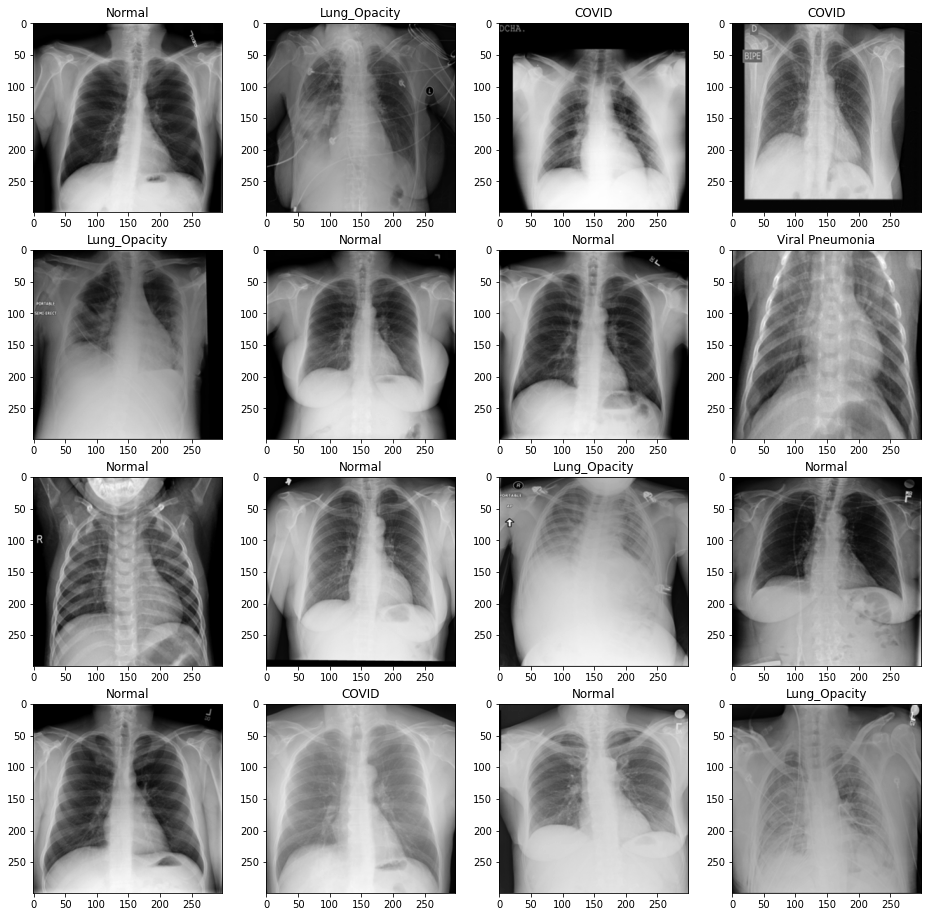

In [3]:
images_in_row = 4
random_indexes = random.choices(range(len(Y)), k=images_in_row*images_in_row)
      
plt.figure(figsize=(16,16))
for j, index in enumerate(random_indexes):
    plt.subplot(images_in_row, images_in_row, j+1)
    plt.imshow(X[index], cmap='gray', vmax=1, vmin=0)
    plt.title(LABELS[np.where(Y[index]==1)[0][0]])


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

In [4]:
X=[]
y=[]

In [5]:
my_model = Sequential()
my_model.add(Conv2D(64, kernel_size=5, activation='relu', input_shape=[299,299, 1]))
my_model.add(MaxPooling2D((2, 2)))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(128, kernel_size=4, activation='relu'))
my_model.add(MaxPooling2D((2, 2)))
my_model.add(Conv2D(128, kernel_size=3, activation='relu'))
my_model.add(MaxPooling2D((2, 2)))
my_model.add(Dropout(0.3))
my_model.add(Flatten())
my_model.add(Dropout(0.5))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(4, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 295, 295, 64)      1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 147, 147, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 147, 147, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 128)     131200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0

2021-10-08 22:17:22.675275: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-08 22:17:22.676095: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-08 22:17:22.709225: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-08 22:17:22.709512: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-10-08 22:17:22.709552: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-10-08 22:17:22.711701: I tensorflow/stream_executor/platform/def

In [6]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='tmp2/checkpoint_epoch{epoch}.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=False)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
csv_logger = keras.callbacks.CSVLogger('training2.log')

history = my_model.fit(X_train, y_train,
                     epochs=40, batch_size=16, callbacks=[callback,model_checkpoint_callback,csv_logger],
                     verbose=1, validation_data=(X_test, y_test))

2021-10-08 22:17:23.130186: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 5297903260 exceeds 10% of free system memory.
2021-10-08 22:17:25.454729: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-08 22:17:25.472207: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2799925000 Hz


Epoch 1/40


2021-10-08 22:17:25.862095: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-10-08 22:17:25.958017: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-10-08 22:17:26.643839: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2021-10-08 22:17:26.757969: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2021-10-08 22:17:28.621602: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-10-08 22:1

925/926 [============================>.] - ETA: 0s - loss: 1.1529 - accuracy: 0.5896

2021-10-08 22:22:14.472032: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.20GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-10-08 22:22:15.523271: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-10-08 22:22:16.571536: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-10-08 22:22:17.826056: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Alloc

926/926 [==============================] - ETA: 0s - loss: 1.1526 - accuracy: 0.5897

2021-10-08 22:22:21.756455: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2270785400 exceeds 10% of free system memory.
2021-10-08 22:22:59.182867: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


926/926 [==============================] - 335s 351ms/step - loss: 1.1524 - accuracy: 0.5897 - val_loss: 0.7505 - val_accuracy: 0.7120
Epoch 2/40
926/926 [==============================] - 304s 328ms/step - loss: 0.7865 - accuracy: 0.6789 - val_loss: 0.7684 - val_accuracy: 0.6972
Epoch 3/40
926/926 [==============================] - 303s 327ms/step - loss: 0.7381 - accuracy: 0.6977 - val_loss: 0.7661 - val_accuracy: 0.7060
Epoch 4/40
926/926 [==============================] - 303s 327ms/step - loss: 0.6820 - accuracy: 0.7249 - val_loss: 0.6364 - val_accuracy: 0.7660
Epoch 5/40
926/926 [==============================] - 302s 326ms/step - loss: 0.5890 - accuracy: 0.7719 - val_loss: 0.4857 - val_accuracy: 0.8291
Epoch 6/40
926/926 [==============================] - 302s 326ms/step - loss: 0.4820 - accuracy: 0.8125 - val_loss: 0.4924 - val_accuracy: 0.8214
Epoch 7/40
926/926 [==============================] - 303s 327ms/step - loss: 0.4111 - accuracy: 0.8361 - val_loss: 0.4355 - val_accura

In [7]:
model = keras.models.load_model('tmp2/checkpoint_epoch9.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 295, 295, 64)      1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 147, 147, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 147, 147, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 128)     131200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0

In [8]:
results = model.evaluate(X_test, y_test, batch_size=16)
results

2021-10-08 23:47:10.178423: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2270785400 exceeds 10% of free system memory.


397/397 [==============================] - 34s 86ms/step - loss: 0.3893 - accuracy: 0.8630


[0.3892732262611389, 0.8629921078681946]